In [55]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import scipy.stats 
import numpy as np

In [33]:
df = pd.read_csv("C:\\Users\\a2-coutodeoliv\\OneDrive - UWE Bristol\\sample\\sample_labels.csv")

In [35]:
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5.0,13.0,060Y,M,AP,3056.0,2544.0,0.139000,0.139000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000013_026.png,Cardiomegaly|Emphysema,26.0,13.0,057Y,M,AP,2500.0,2048.0,0.168000,0.168000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11207,00030789_000.png,Infiltration,0.0,30789.0,052Y,F,PA,2021.0,2021.0,0.194311,0.194311
11208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11209,00030792_000.png,No Finding,0.0,30792.0,010Y,F,PA,1775.0,1712.0,0.194311,0.194311
11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
print(df['Patient Age'].describe())

count     5606
unique      92
top       058Y
freq       167
Name: Patient Age, dtype: object


In [38]:
print(df['Patient Age'].value_counts(ascending=True, dropna=True))

088Y      1
411Y      1
086Y      1
013M      1
094Y      1
       ... 
051Y    147
057Y    148
055Y    152
054Y    158
058Y    167
Name: Patient Age, Length: 92, dtype: int64


In [48]:
df['Patient Age'] = df['Patient Age'].str.replace('Y', '')
df['Patient Age'] = df['Patient Age'].str.replace('M', '')
df['Patient Age'] = df['Patient Age'].str.replace('D', '')

df = df.dropna()

print(df['Patient Age'])



df["Patient Age"] = df["Patient Age"].astype(str).astype(int)
List_Above100 = df.index[df['Patient Age']>100].tolist()

print(List_Above100)

1        060
3        057
5        077
7        079
9        055
        ... 
11203    058
11205    061
11207    052
11209    010
11211    024
Name: Patient Age, Length: 5606, dtype: object
[8485]


In [50]:
print(df.loc[List_Above100])

           Image Index Finding Labels  Follow-up #  Patient ID  Patient Age  \
8485  00020900_002.png     No Finding          2.0     20900.0          411   

     Patient Gender View Position  OriginalImageWidth  OriginalImageHeight  \
8485              M            AP              3056.0               2544.0   

      OriginalImagePixelSpacing_x  OriginalImagePixelSpacing_y  
8485                        0.139                        0.139  


In [51]:

print(df['Patient Age'].value_counts(bins=5))

(0.589, 83.0]     5588
(83.0, 165.0]       17
(329.0, 411.0]       1
(165.0, 247.0]       0
(247.0, 329.0]       0
Name: Patient Age, dtype: int64


In [52]:
df = df.drop(List_Above100)

In [53]:

df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
1,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5.0,13.0,60,M,AP,3056.0,2544.0,0.139000,0.139000
3,00000013_026.png,Cardiomegaly|Emphysema,26.0,13.0,57,M,AP,2500.0,2048.0,0.168000,0.168000
5,00000017_001.png,No Finding,1.0,17.0,77,M,AP,2500.0,2048.0,0.168000,0.168000
7,00000030_001.png,Atelectasis,1.0,30.0,79,M,PA,2992.0,2991.0,0.143000,0.143000
9,00000032_001.png,Cardiomegaly|Edema|Effusion,1.0,32.0,55,F,AP,2500.0,2048.0,0.168000,0.168000
...,...,...,...,...,...,...,...,...,...,...,...
11203,00030712_000.png,No Finding,0.0,30712.0,58,M,PA,2021.0,2021.0,0.194311,0.194311
11205,00030786_005.png,Cardiomegaly|Effusion|Emphysema,5.0,30786.0,61,F,AP,3056.0,2544.0,0.139000,0.139000
11207,00030789_000.png,Infiltration,0.0,30789.0,52,F,PA,2021.0,2021.0,0.194311,0.194311
11209,00030792_000.png,No Finding,0.0,30792.0,10,F,PA,1775.0,1712.0,0.194311,0.194311


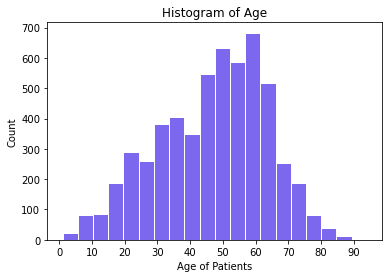

In [56]:

plt.hist(df['Patient Age'] ,
         histtype='bar',bins = 20, color='mediumslateblue',
         edgecolor='white')
plticker.MultipleLocator(base=1)





plt.gca().xaxis.set_ticks(np.arange(0, 100, 10))


plt.title("Histogram of Age")
plt.xlabel('Age of Patients')
plt.ylabel('Count')



plt.show()

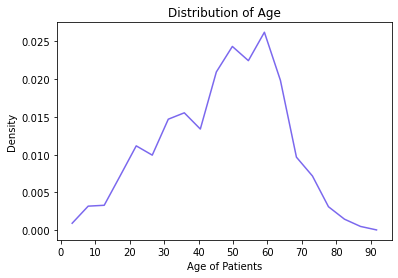

In [57]:
#Plot the distribution of the ages 


value, bins = np.histogram(df['Patient Age'].to_list(), bins=20, density= True)
mean_bins = [(bins[i] + bins[i+1])/2. for i in range(len(bins)-1)]
plt.gca().xaxis.set_ticks(np.arange(0, 100, 10))

plt.title("Distribution of Age")
plt.xlabel('Age of Patients')
plt.ylabel('Density')


plt.plot(mean_bins, value, color='mediumslateblue')

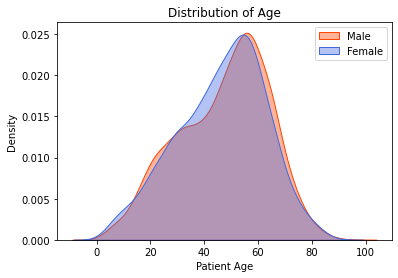

In [58]:



M = df[df["Patient Gender"]=="M"]
F = df[df["Patient Gender"]=="F"]

X1 = M["Patient Age"].dropna()
X2 = F["Patient Age"].dropna()
L1=sns.kdeplot(X1, shade=True, label="Male", color="orangered", alpha=0.4)
L2=sns.kdeplot(X2, shade=True, label="Female",color='royalblue', alpha=0.4)



plt.title("Distribution of Age")

plt.legend()
plt.show()

In [59]:
#get count of how many unique illnesses in the data set


print(df['Finding Labels'].value_counts(ascending=True, dropna=False))

Emphysema|Infiltration|Pleural_Thickening|Pneumothorax               1
Atelectasis|Consolidation|Nodule                                     1
Atelectasis|Consolidation|Effusion|Fibrosis|Pleural_Thickening       1
Consolidation|Effusion|Infiltration|Pleural_Thickening               1
Consolidation|Edema|Effusion|Pneumonia                               1
                                                                  ... 
Nodule                                                             144
Atelectasis                                                        192
Effusion                                                           203
Infiltration                                                       503
No Finding                                                        3043
Name: Finding Labels, Length: 244, dtype: int64


In [60]:
#some of the values are recorded as a combination of multiple types, we need to break them to show the true count



Label_list = []

for row in df['Finding Labels']:
    Label_list.append(row.split('|'))
    
#break list within list 
Label_list = [item for c_list in Label_list for item in c_list]  
    
num_values = len(set(Label_list))
print('The amount of records are:', len(Label_list))
print('Unique values are:', num_values)

The amount of records are: 6977
Unique values are: 15


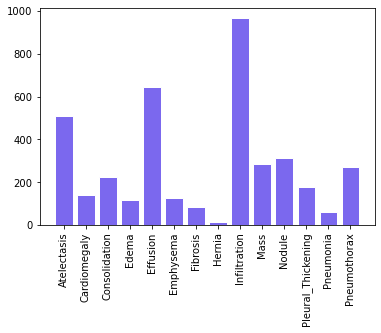

In [62]:
#plot a bar chart to show the comparison 
# To better showcase the count of the illnesses we need to remove the No findings
# this is because they are the one with the highest count and make it hardert to understand the other types


new_list = []

for item in Label_list:
    
    if item == 'No Finding':
        
        continue
    
    new_list.append(item)

#plotting bar graph 

values, counts = np.unique(new_list, return_counts=True)

plt.bar(values, counts, color='mediumslateblue',edgecolor='white')
plt.rcParams["figure.figsize"] = (10,8.5)
plt.xticks(rotation=90)

plt.show()



In [63]:
df_male = df[df['Patient Gender']=='M']
df_female = df[df['Patient Gender']=='F']

In [67]:
# certain patients in the data set had more than one illnesses, we need to separete them to get the specific count by type
#We will break them and insert them in two empty lists

Unique_Sick_Males = []
Unique_Sick_Females = []

for row in df_male['Finding Labels']:
    Unique_Sick_Males .append(row.split('|'))

for row in df_female['Finding Labels']:
    Unique_Sick_Females .append(row.split('|'))
    
#break list withi lists
    
Unique_Sick_Males = [item for c_list in Unique_Sick_Males for item in c_list] 
Unique_Sick_Females = [item for c_list in Unique_Sick_Females for item in c_list] 

print(Unique_Sick_Males[:5] )

['Emphysema', 'Infiltration', 'Pleural_Thickening', 'Pneumothorax', 'Cardiomegaly']


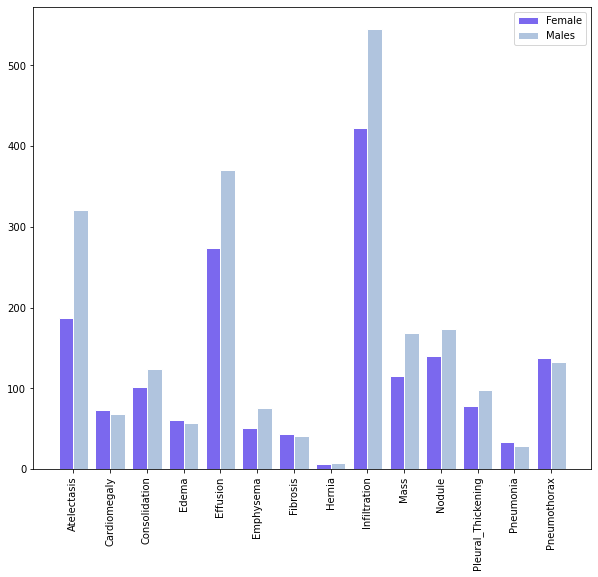

In [68]:
# To better showcase the count of the illnesses we need to remove the No findings
# this is because they are the one with the highest count and make it hardert to understand the other types

new_list_Males = []
new_list_Females = []

for item in Unique_Sick_Females:
    if item == 'No Finding':
        continue
    new_list_Females.append(item)

for item in Unique_Sick_Males:
    if item == 'No Finding': 
        continue
    
    new_list_Males.append(item)




#ploting multiple bar graphs 

values1, counts1 = np.unique(new_list_Females, return_counts=True)
values2, counts2 = np.unique(new_list_Males, return_counts=True)


x_axis = np.arange(len(values1))
plt.bar(x_axis - 0.2, counts1, 0.4, label = 'Female', color='mediumslateblue', edgecolor='white')
plt.bar(x_axis + 0.2, counts2, 0.4, label = 'Males', color='lightsteelblue', edgecolor='white')
plt.xticks(x_axis, values1)
plt.rcParams["figure.figsize"] = (10,8.5)
plt.xticks(rotation=90)

plt.legend()
plt.show()

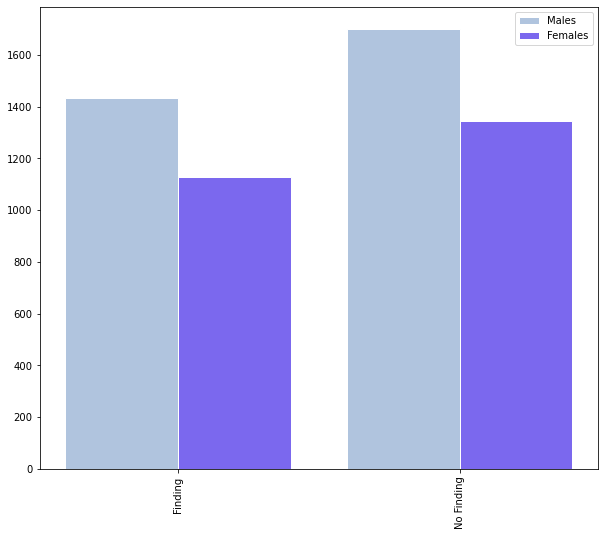

In [69]:
# We now want to showcase two caterogies, these being no findings and finding 
# We need to add all the types of illnesses as one type, Finding.

Male_Findings = []
Female_Findings = []

for row in df_male['Finding Labels']:
    if row == 'No Finding':
        Male_Findings.append('No Finding')
    else:
        Male_Findings.append('Finding')
        
for row in df_female['Finding Labels']:
    if row == 'No Finding':
        Female_Findings.append('No Finding')
    else:
        Female_Findings.append('Finding')
        
#ploting multiple bar graphs 

values3, counts3 = np.unique(Male_Findings , return_counts=True)
values4, counts4 = np.unique(Female_Findings, return_counts=True)


x_axis1 = np.arange(len(values3))
plt.bar(x_axis1 - 0.2, counts3, 0.4, label = 'Males', color = 'lightsteelblue', edgecolor='white')
plt.bar(x_axis1 + 0.2, counts4, 0.4, label = 'Females', color = 'mediumslateblue', edgecolor='white')
plt.xticks(x_axis1, values3)
plt.rcParams["figure.figsize"] = (10,8.5)
plt.xticks(rotation=90)

plt.legend()
plt.show()
        
  

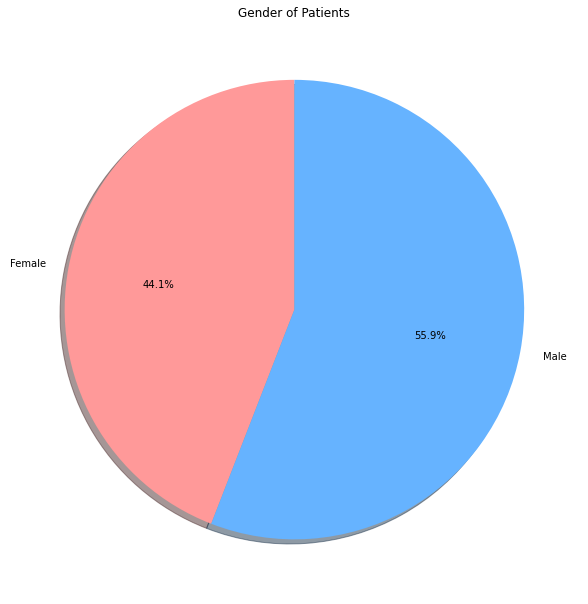

In [70]:
#create a piechart to showcase the number of males vs females in the datase

label = ['Female', 'Male']
color = ['#ff9999','#66b3ff']
plt.pie(df.groupby('Patient Gender').size(), labels = label,  autopct='%1.1f%%', shadow=True, startangle=90, colors = color)

plt.title('Gender of Patients')
plt.tight_layout()
plt.show()

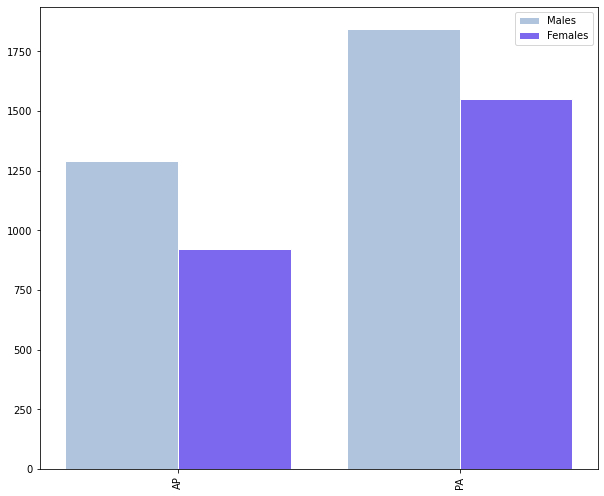

In [71]:
#plot barplot to showcase PA images Vs Ap images by gender type


values5, counts5 = np.unique(df_male['View Position'] , return_counts=True)
values6, counts6 = np.unique(df_female['View Position'], return_counts=True)


x_axis2 = np.arange(len(values5))
plt.bar(x_axis2 - 0.2, counts5, 0.4, label = 'Males', color = 'lightsteelblue', edgecolor='white')
plt.bar(x_axis2 + 0.2, counts6, 0.4, label = 'Females', color = 'mediumslateblue', edgecolor='white')
plt.xticks(x_axis2, values5)
plt.rcParams["figure.figsize"] = (10,8.5)
plt.xticks(rotation=90)

plt.legend()
plt.show()
        